# Conclusion:

- Noticed Dataset is unbalanced, below is the targeted variable 'fraudulent' value
    - 0    17014
    - 1      866
- Split field 'location' into three new fields named: 'Country', 'State', 'City'
- Filled values of field 'function'
- created new CSV 'postings_v1.csv' file with modified data

# Import Libraries & Packages

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import Dataset

In [13]:
df = pd.read_csv("./fake_job_postings.csv")
df.head(3)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0


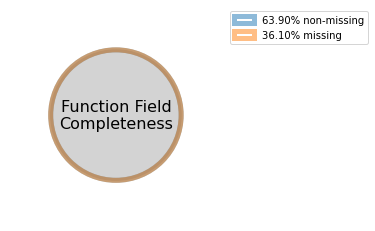

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



# separate missing and non-missing values
missing_values = df['function'].isnull()
non_missing_values = ~missing_values

# calculate percentage of missing and non-missing values
percent_missing = missing_values.sum() / len(df) * 100
percent_non_missing = non_missing_values.sum() / len(df) * 100

# create gauge plot
fig, ax = plt.subplots()

# set background color
ax.set_facecolor('#F8F8F8')

# add two colored sections to gauge plot
ax.add_patch(plt.Circle((0.5, 0.5), 0.3, color='lightgray'))
ax.add_patch(plt.Circle((0.5, 0.5), 0.3, color='tab:blue', fill=False, lw=5, alpha=0.5, zorder=10,
                        label=f'{percent_non_missing:.2f}% non-missing'))
ax.add_patch(plt.Circle((0.5, 0.5), 0.3, color='tab:orange', fill=False, lw=5, alpha=0.5, zorder=10,
                        label=f'{percent_missing:.2f}% missing'))

# add text to center of gauge plot
ax.text(0.5, 0.5, 'Function Field\nCompleteness', ha='center', va='center', fontsize=16)

# add legend to gauge plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# remove axes and set aspect ratio to "equal"
ax.set_aspect('equal')
ax.axis('off')

# display plot
plt.show()



In [14]:
df.shape

(17880, 18)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

## Missing values in bar plot

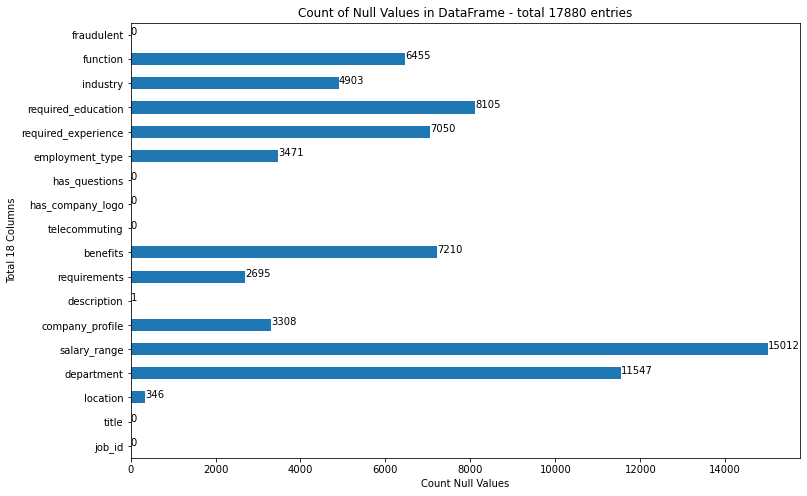

In [16]:
null_counts = df.isna().sum()
fig, ax = plt.subplots(figsize=(12, 8))  # set figsize parameter to increase figure size
null_counts.plot(kind='barh', ax=ax)
ax.set_xlabel('Count Null Values')
ax.set_ylabel('Total 18 Columns')
plt.title('Count of Null Values in DataFrame - total 17880 entries')

# add value labels to the horizontal bars
for i, v in enumerate(null_counts):
    ax.text(v, i, str(v))
    
plt.show()



In [17]:
# Percentages of Null values in dataframe df
round(df.isnull().mean() * 100, 2)

job_id                  0.00
title                   0.00
location                1.94
department             64.58
salary_range           83.96
company_profile        18.50
description             0.01
requirements           15.07
benefits               40.32
telecommuting           0.00
has_company_logo        0.00
has_questions           0.00
employment_type        19.41
required_experience    39.43
required_education     45.33
industry               27.42
function               36.10
fraudulent              0.00
dtype: float64

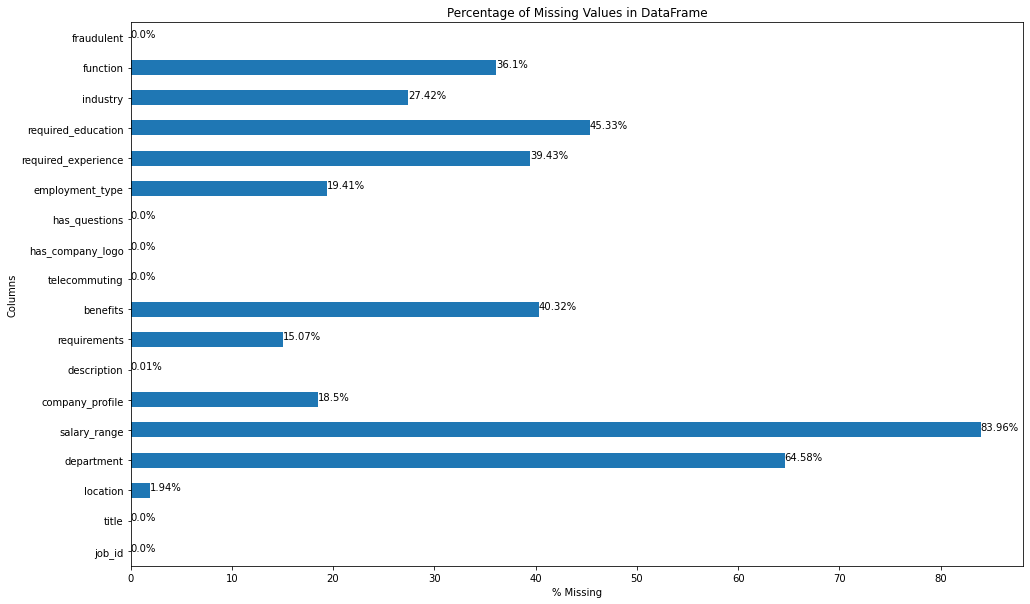

In [18]:
null_percent = round(df.isnull().mean() * 100, 2)
fig, ax = plt.subplots(figsize=(16, 10))
null_percent.plot(kind='barh', ax=ax)
ax.set_xlabel('% Missing')
ax.set_ylabel('Columns')
plt.title('Percentage of Missing Values in DataFrame')

# add value labels to the horizontal bars
for i, v in enumerate(null_percent):
    ax.text(v, i, str(v)+'%')

plt.show()


## Plot unbalanced targated value

In [19]:
# dataset is unbalanced

#  total number of real and fake postings in dataframe
df['fraudulent'].value_counts()

0    17014
1      866
Name: fraudulent, dtype: int64

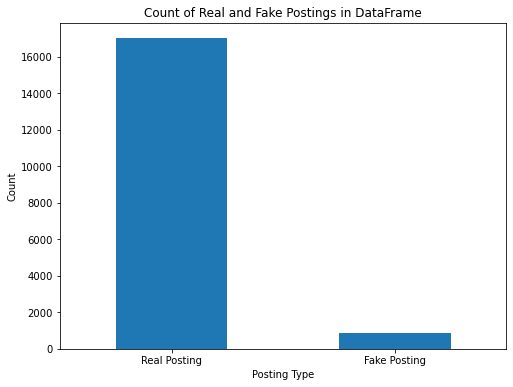

In [20]:
import matplotlib.pyplot as plt

# assuming df is your dataframe
null_fraudulent = df['fraudulent'].value_counts()
null_fraudulent.index = ['Real Posting', 'Fake Posting']
fig, ax = plt.subplots(figsize=(8, 6))
null_fraudulent.plot(kind='bar', ax=ax)
ax.set_xlabel('Posting Type')
ax.set_ylabel('Count')
plt.title('Count of Real and Fake Postings in DataFrame')

# rotate x-axis labels
plt.xticks(rotation=0)

plt.show()


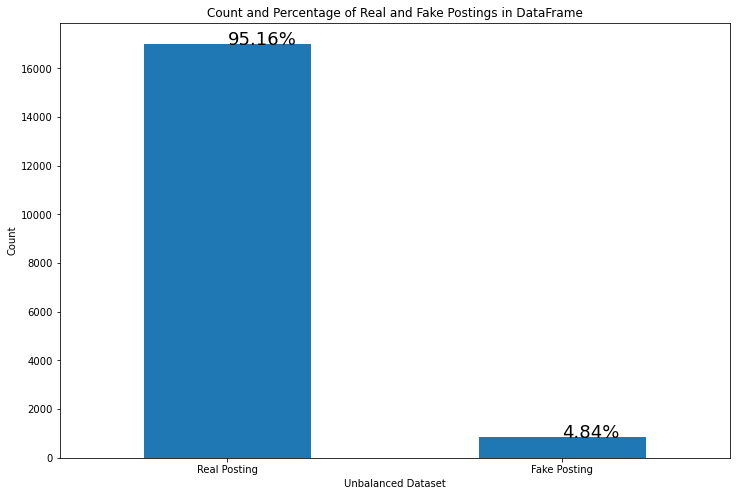

In [21]:
null_fraudulent = df['fraudulent'].value_counts()
null_fraudulent.index = ['Real Posting', 'Fake Posting']
percent_fraudulent = round(null_fraudulent / len(df) * 100, 2)  # calculate percentage of each type
fig, ax = plt.subplots(figsize=(12, 8))
null_fraudulent.plot(kind='bar', ax=ax)
ax.set_xlabel('Unbalanced Dataset')
ax.set_ylabel('Count')
plt.title('Count and Percentage of Real and Fake Postings in DataFrame')

# add value labels to the vertical bars
for i, v in enumerate(null_fraudulent):
    ax.text(i, v - 30, str(percent_fraudulent[i]) + '%', fontsize=18)

plt.xticks(rotation=0)
plt.show()


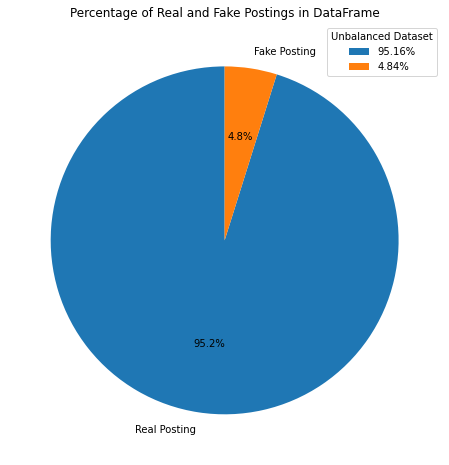

In [22]:
null_fraudulent = df['fraudulent'].value_counts()
null_fraudulent.index = ['Real Posting', 'Fake Posting']
percent_fraudulent = round(null_fraudulent / len(df) * 100, 2)  # calculate percentage of each type

# create a pie chart
fig, ax = plt.subplots(figsize=(12, 8))
ax.pie(null_fraudulent, labels=null_fraudulent.index, autopct='%1.1f%%', startangle=90)

# add title and legend
plt.title('Percentage of Real and Fake Postings in DataFrame')
plt.legend(title='Unbalanced Dataset', loc='upper right', labels=percent_fraudulent.astype(str) + '%')

plt.show()


## Location - Country State City

In [23]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [14]:
df = pd.read_csv("./postings_v1.csv")
df.head(3)

,job_id,title,location,Country,State,City,department,salary_range,company_profile,description,...,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",US,NY,New York,Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",NZ,,Auckland,Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",US,IA,Wever,NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",...,NaN,0,1,0,NaN,NaN,NaN,NaN,Assistant,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   Country              17534 non-null  object
 4   State                17440 non-null  object
 5   City                 17440 non-null  object
 6   department           6333 non-null   object
 7   salary_range         2868 non-null   object
 8   company_profile      14572 non-null  object
 9   description          17879 non-null  object
 10  requirements         15185 non-null  object
 11  benefits             10670 non-null  object
 12  telecommuting        17880 non-null  int64 
 13  has_company_logo     17880 non-null  int64 
 14  has_questions        17880 non-null  int64 
 15  employment_type      14409 non-null  object
 16  requ

In [27]:
df.head(5)

,job_id,title,location,Country,State,City,department,salary_range,company_profile,description,...,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",US,NY,New York,Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",NZ,,Auckland,Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",US,IA,Wever,NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",...,NaN,0,1,0,NaN,NaN,NaN,NaN,Assistant,0
3,4,Account Executive - Washington DC,"US, DC, Washington",US,DC,Washington,Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,...,Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",US,FL,Fort Worth,NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


# Data from Countries

In [16]:
df.Country.unique()

array(['US', 'NZ', 'DE', 'GB', 'AU', 'SG', 'IL', 'AE', 'CA', 'IN', 'EG',
       'PL', 'GR', nan, 'PK', 'BE', 'BR', 'SA', 'DK', 'RU', 'ZA', 'CY',
       'HK', 'TR', 'IE', 'LT', 'JP', 'NL', 'AT', 'KR', 'FR', 'EE', 'TH',
       'PA', 'KE', 'MU', 'MX', 'RO', 'MY', 'FI', 'CN', 'ES', 'SE', 'CL',
       'UA', 'QA', 'IT', 'LV', 'IQ', 'BG', 'PH', 'CZ', 'VI', 'MT', 'HU',
       'BD', 'KW', 'LU', 'NG', 'RS', 'BY', 'VN', 'ID', 'ZM', 'NO', 'BH',
       'UG', 'CH', 'TT', 'SD', 'SK', 'AR', 'TW', 'PT', 'PE', 'CO', 'IS',
       'SI', 'MA', 'AM', 'TN', 'GH', 'AL', 'HR', 'CM', 'SV', 'NI', 'LK',
       'JM', 'KZ', 'KH'], dtype=object)

In [17]:
# count the unique values in the Country field
num_countries = df['Country'].nunique()

print("Number of unique countries in the dataset:", num_countries)


Number of unique countries in the dataset: 90


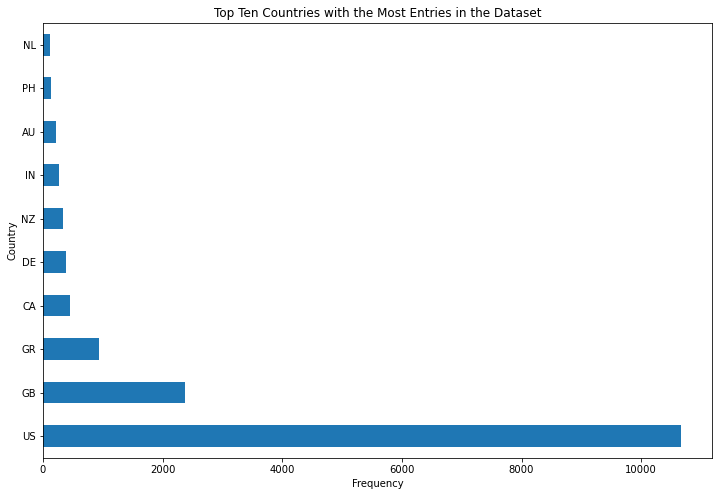

In [36]:

# count the frequency of each country and sort by descending order
country_freq = df['Country'].value_counts().sort_values(ascending=False)

# get the top ten unique countries with the most entries
top_countries = country_freq.head(10)

# create a horizontal bar chart
fig, ax = plt.subplots(figsize=(12, 8))
top_countries.plot(kind='barh', ax=ax)

# add labels and title
ax.set_xlabel('Frequency')
ax.set_ylabel('Country')
plt.title('Top Ten Countries with the Most Entries in the Dataset')

plt.show()


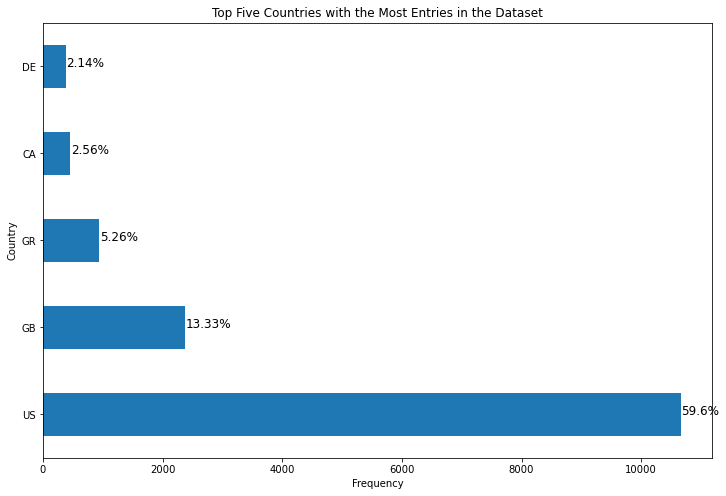

In [37]:
# count the frequency of each country and sort by descending order
country_freq = df['Country'].value_counts().sort_values(ascending=False)

# get the top five unique countries with the most entries
top_countries = country_freq.head(5)

# calculate the percentage of each country from the total dataset
percent_countries = round(top_countries / len(df) * 100, 2)

# create a horizontal bar chart
fig, ax = plt.subplots(figsize=(12, 8))
top_countries.plot(kind='barh', ax=ax)

# add labels and title
ax.set_xlabel('Frequency')
ax.set_ylabel('Country')
plt.title('Top Five Countries with the Most Entries in the Dataset')

# add percentage labels to the bars
for i, v in enumerate(top_countries):
    ax.text(v + 10, i, str(percent_countries[i]) + '%', fontsize=12)

plt.show()


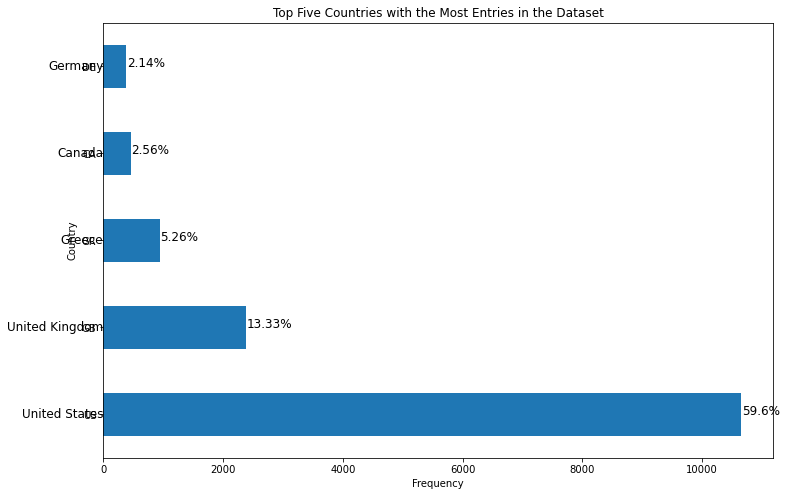

In [41]:

import pycountry_convert as pc


# count the frequency of each country code and sort by descending order
country_freq = df['Country'].value_counts().sort_values(ascending=False)

# get the top five unique countries with the most entries
top_countries = country_freq.head(5)

# convert country codes into country names
country_names = []
for country_code in top_countries.index:
    country_names.append(pc.country_alpha2_to_country_name(country_code))

# calculate the percentage of each country from the total dataset
percent_countries = round(top_countries / len(df) * 100, 2)

# create a horizontal bar chart
fig, ax = plt.subplots(figsize=(12, 8))
top_countries.plot(kind='barh', ax=ax)

# add labels and title
ax.set_xlabel('Frequency')
ax.set_ylabel('Country')
plt.title('Top Five Countries with the Most Entries in the Dataset')

# add percentage labels and country names to the bars
for i, v in enumerate(top_countries):
    ax.text(v + 10, i, str(percent_countries[i]) + '%', fontsize=12)
    ax.text(0, i, country_names[i], ha='right', va='center', fontsize=12)

plt.show()


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   Country              17534 non-null  object
 4   State                17440 non-null  object
 5   City                 17440 non-null  object
 6   department           6333 non-null   object
 7   salary_range         2868 non-null   object
 8   company_profile      14572 non-null  object
 9   description          17879 non-null  object
 10  requirements         15185 non-null  object
 11  benefits             10670 non-null  object
 12  telecommuting        17880 non-null  int64 
 13  has_company_logo     17880 non-null  int64 
 14  has_questions        17880 non-null  int64 
 15  employment_type      14409 non-null  object
 16  requ

# Has Company Profile

In [38]:
df = pd.read_csv("./postings_v2.csv")


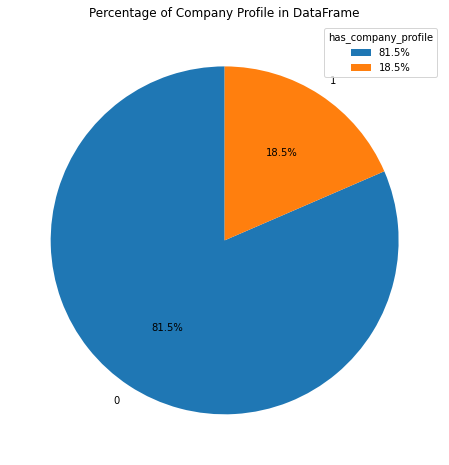

In [39]:
has_company_profile = df['has_company_profile'].value_counts()
has_company_profile.index = [0, 1]
percent_has_company_profile = round(has_company_profile / len(df) * 100, 2)  # calculate percentage of each type

# create a pie chart
fig, ax = plt.subplots(figsize=(12, 8))
ax.pie(has_company_profile, labels=has_company_profile.index, autopct='%1.1f%%', startangle=90)

# add title and legend
plt.title('Percentage of Company Profile in DataFrame')
plt.legend(title='has_company_profile', loc='upper right', labels=percent_has_company_profile.astype(str) + '%')

plt.show()

# Education Required

In [46]:
df = pd.read_csv("./postings_v4.csv")


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   title                   17880 non-null  object
 1   Country                 17880 non-null  object
 2   State                   17880 non-null  object
 3   City                    17880 non-null  object
 4   has_salary              17880 non-null  int64 
 5   salary_range            17880 non-null  object
 6   description             17880 non-null  object
 7   requirements            17880 non-null  object
 8   benefits                17880 non-null  object
 9   telecommuting           17880 non-null  int64 
 10  has_company_logo        17880 non-null  int64 
 11  has_questions           17880 non-null  int64 
 12  has_company_profile     17880 non-null  int64 
 13  has_required_education  17880 non-null  int64 
 14  employment_type         17880 non-null  object
 15  re

In [ ]:
done upto 07

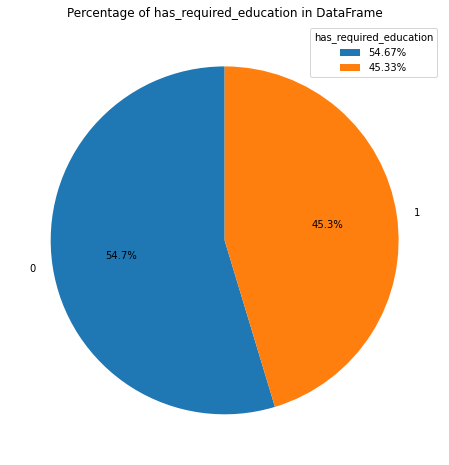

In [49]:
has_required_education  = df['has_required_education'].value_counts()
has_required_education.index = [0, 1]
percent_has_required_education = round(has_required_education  / len(df) * 100, 2)  # calculate percentage of each type

# create a pie chart
fig, ax = plt.subplots(figsize=(12, 8))
ax.pie(has_required_education, labels=has_required_education.index, autopct='%1.1f%%', startangle=90)

# add title and legend
plt.title('Percentage of has_required_education in DataFrame')
plt.legend(title='has_required_education', loc='upper right', labels=percent_has_required_education.astype(str) + '%')

plt.show()

# Salary

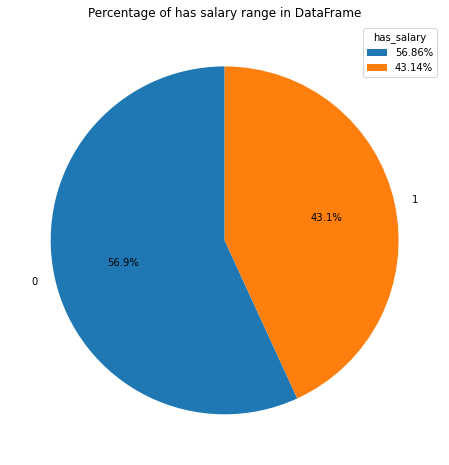

In [51]:
has_salary = df['has_salary'].value_counts()
has_salary.index = [0, 1]
percent_has_salary = round(has_salary  / len(df) * 100, 2)  # calculate percentage of each type

# create a pie chart
fig, ax = plt.subplots(figsize=(12, 8))
ax.pie(has_salary, labels=has_salary.index, autopct='%1.1f%%', startangle=90)

# add title and legend
plt.title('Percentage of has salary range in DataFrame')
plt.legend(title='has_salary', loc='upper right', labels=percent_has_salary.astype(str) + '%')

plt.show()

In [68]:
# Percentages of Null values in dataframe df
round(df.isnull().mean() * 100, 2)

title                     0.0
Country                   0.0
State                     0.0
City                      0.0
has_salary                0.0
salary_range              0.0
description               0.0
requirements              0.0
benefits                  0.0
telecommuting             0.0
has_company_logo          0.0
has_questions             0.0
has_company_profile       0.0
has_required_education    0.0
employment_type           0.0
required_experience       0.0
required_education        0.0
industry                  0.0
function                  0.0
fraudulent                0.0
dtype: float64

In [70]:
df = pd.read_csv("./postings_v4.csv")
df.head(3)

,title,Country,State,City,has_salary,salary_range,description,requirements,benefits,telecommuting,has_company_logo,has_questions,has_company_profile,has_required_education,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,US,NY,New York,0,Not Available,"Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,No Listed Benefits,0,1,0,1,0,Other,Internship,Unknown,Unknown,Marketing,0
1,Customer Service - Cloud Video Production,NZ,,Auckland,1,90,Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,1,0,Full-time,Not Applicable,Unknown,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),US,IA,Wever,0,Not Available,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,No Listed Benefits,0,1,0,1,0,Unknown,Not Applicable,Unknown,Unknown,Assistant,0


In [69]:
# create new csv file

df.to_csv('postings_v4.csv', index=False)

In [67]:
df = df.reindex(columns=['title', 'Country', 'State', 'City', 'has_salary', 'salary_range',
       'description', 'requirements', 'benefits', 'telecommuting', 'has_company_logo', 'has_questions', 
        'has_company_profile', 'has_required_education', 'employment_type', 'required_experience', 
        'required_education', 'industry', 'function', 'fraudulent'])